# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Farhan Jahr Daffa]
- **Email:** [farhan.d.dafa@gmail.com]
- **ID Dicoding:** [farhan_jahr25]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Pada pola peminjaman sepeda dalam sehari, tanpa menyangkutpautkan hari libur, apakah ada jarak jam tertentu di mana terjadinya peningkatan rental sepeda?
- Pertanyaan 2: Perusahaan ingin meningkatkan pendapatan dengan mempromosikan keanggotaan pada pengguna casual (pengguna yang belum registered), kapan saat yang tepat untuk mempromosikan keanggotaan pada pengguna casual?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Dataset Day, merupakan kumpulan data yang diagregatkan secara perhari

In [2]:
days_df = pd.read_csv("data/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Dataset hour, kumpulan data yang diagregatkan tiap jam dalam sehari

In [3]:
hours_df = pd.read_csv("data/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Assessing Data Day.csv

In [4]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kesalahan tipe data pada kolom 'dteday', seharusnya Dtype nya 'datetime' bukan 'object'

In [5]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
days_df.sort_values(by='cnt', ascending=True)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,4,1,10,0,1,1,3,0.440000,0.439400,0.880000,0.358200,2,20,22
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555


Pada kolom 'cnt' terdapat nilai anomali 22. dikarenakan pada tanggal 2012-10-29 terjadi penutupan Washington DC dalam persiapan menghadapi badai Sandy.
source: https://www.theguardian.com/world/2012/oct/29/washington-dc-shutdown-hurricane-sandy

#### Assessing Data Hour.csv

In [8]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti day.csv, terdapat kesalahan tipe data pada 'dteday'

In [9]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hours_df.cnt.describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

### Cleaning Data

#### Membersihkan Data day.csv

Mengubah Dtype pada 'dteday'

In [12]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  days_df[column] = pd.to_datetime(days_df[column])

days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Menghapus data anomali yang 'cnt' nya paling rendah

In [13]:
days_df[days_df.cnt == days_df.cnt.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,4,1,10,0,1,1,3,0.44,0.4394,0.88,0.3582,2,20,22


In [14]:
idx_min_cnt = days_df['cnt'].idxmin()
print(idx_min_cnt)

667


In [15]:
days_df.drop([idx_min_cnt], inplace=True)

In [16]:
days_df.sort_values(by='cnt', ascending=True)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555


#### Membersihkan data hour.csv

Mengubah Dtype pada 'dteday'

In [17]:
datetime_columns_hour = ["dteday"]
 
for column_hour in datetime_columns_hour:
  hours_df[column_hour] = pd.to_datetime(hours_df[column_hour])

hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Data day.csv

In [18]:
days_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.586301,2011-12-31 14:04:16.438356224,2.494521,0.500000,6.515068,0.028767,3.000000,0.683562,1.393151,0.495461,0.474402,0.627549,0.190256,849.335616,3661.153425,4510.489041
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,9.000000,416.000000,431.000000
25%,183.250000,2011-07-02 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.520000,0.134950,316.250000,2502.250000,3169.750000
50%,365.500000,2011-12-31 12:00:00,2.500000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499167,0.487364,0.626250,0.180971,717.000000,3664.500000,4548.500000
75%,547.750000,2012-06-30 18:00:00,3.000000,1.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.729896,0.233207,1096.500000,4783.250000,5966.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.013951,NaN,1.110171,0.500343,3.451871,0.167266,2.004795,0.465405,0.542015,0.183165,0.163068,0.142220,0.077301,686.377168,1555.499166,1931.408300


Melihat Korelasi tiap Kolom yang bersifat numerik:

In [19]:
days_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991706,0.127981,-0.157563,0.543374,0.541098,0.628887
atemp,0.991706,1.000000,0.140816,-0.183603,0.544085,0.545559,0.632732
hum,0.127981,0.140816,1.000000,-0.255111,-0.074253,-0.085935,-0.095597
windspeed,-0.157563,-0.183603,-0.255111,1.000000,-0.164656,-0.212001,-0.229254
casual,0.543374,0.544085,-0.074253,-0.164656,1.000000,0.393219,0.672063
registered,0.541098,0.545559,-0.085935,-0.212001,0.393219,1.000000,0.945111
cnt,0.628887,0.632732,-0.095597,-0.229254,0.672063,0.945111,1.000000


Membuat Tabel yang menunjukkan data kategori pengguna pada masing-masing musim

In [20]:
days_df["season_group"] = days_df.season.apply(lambda x: "Springer" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))
days_df.groupby(by='season_group').agg({
    'casual':['min','max', 'mean'],
    'registered': ['min','max', 'mean']  
}).sort_values(by=('casual', 'mean'), ascending=False)

casual                    registered                   
                min   max         mean        min   max         mean
season_group                                                        
Fall            118  3160  1202.611702        889  6917  4441.691489
Summer          120  3410  1106.097826        674  6456  3886.233696
Winter           50  3031   733.220339        570  6946  4021.531073
Springer          9  3155   334.928177        416  5315  2269.204420

Membuat tabel data kategori pengguna berdasarkan hari libur

In [21]:
days_df["holiday_group"] = days_df.holiday.apply(lambda x: "not holiday" if x == 0 else "holiday")
days_df.groupby(by='holiday_group').agg({
    'casual': ['min','max', 'mean'],
    'registered': ['min','max', 'mean'],
    'cnt' : ['min','max', 'mean']
})


casual                    registered                      cnt  \
                 min   max         mean        min   max         mean   min   
holiday_group                                                                 
holiday          117  3065  1064.714286        573  5172  2670.285714  1000   
not holiday        9  3410   842.956276        416  6946  3690.502116   431   

                                  
                max         mean  
holiday_group                     
holiday        7403  3735.000000  
not holiday    8714  4533.458392

Pivot tabel antara musim, hari libur, dan kategori pengguna

In [22]:
days_df.groupby(by=["season_group", "holiday_group"]).agg({
    'instant':'nunique',
   'casual':['min','max', 'mean'],
    'registered': ['min','max', 'mean']
})

instant casual                    registered        \
                           nunique    min   max         mean        min   max   
season_group holiday_group                                                      
Fall         holiday             4   1236  3065  2207.000000       2115  4841   
             not holiday       184    118  3160  1180.777174        889  6917   
Springer     holiday             7    117   502   306.428571        573  2627   
             not holiday       174      9  3155   336.074713        416  5315   
Summer       holiday             4    642  2557  1486.500000       2484  5172   
             not holiday       180    120  3410  1097.644444        674  6456   
Winter       holiday             6    440  1514   906.666667        935  5172   
             not holiday       171     50  3031   727.134503        570  6946   

                                         
                                   mean  
season_group holiday_group               
Fall         holiday        3500.750000  
             not holiday    4462.146739  
Springer     holiday        1381.428571  
             not holiday    2304.919540  
Summer       holiday        3422.750000  
             not holiday    3896.533333  
Winter       holiday        3118.666667  
             not holiday    4053.210526

Kategori pengguna berdasarkan cuaca

In [23]:
days_df["weather_group"] = days_df.weathersit.apply(lambda x: "Clear" if x == 1 else ("Mist" if x == 2 else ("Light Rain" if x == 3 else "Heavy Rain")))
days_df.groupby(by='weather_group').agg({
    'casual':['min','max', 'mean'],
    'registered': ['min','max', 'mean']
})

casual                   registered                   
                 min   max        mean        min   max         mean
weather_group                                                       
Clear             15  3410  964.030238        416  6946  3912.755940
Light Rain         9  1264  194.650000        432  4324  1697.700000
Mist               9  3155  687.352227        491  6844  3348.510121

Kategori pengguna berdasarkan musim dan cuaca

In [24]:
days_df.groupby(by=["season_group", "weather_group"]).agg({
    'instant':'nunique',
   'casual':['min','max', 'mean'],
    'registered': ['min','max', 'mean']
})

instant casual                    registered        \
                           nunique    min   max         mean        min   max   
season_group weather_group                                                      
Fall         Clear             136    562  3160  1234.889706       2298  6917   
             Light Rain          4    118  1264   434.750000       1689  3195   
             Mist               48    226  3065  1175.145833        889  6271   
Springer     Clear             111     15  1658   374.432432        416  5315   
             Light Rain          4      9   192    70.250000        432  1977   
             Mist               66      9  3155   284.530303        491  4681   
Summer       Clear             113    222  3410  1295.469027       1515  6456   
             Light Rain          3    120   179   140.000000        674  1506   
             Mist               68    166  2496   834.029412       1221  6110   
Winter       Clear             103    143  3031   878.165049        935  6946   
             Light Rain          9     50   315   161.444444        570  4324   
             Mist               65     87  2643   582.707692       1009  6844   

                                         
                                   mean  
season_group weather_group               
Fall         Clear          4643.367647  
             Light Rain     2317.000000  
             Mist           4047.333333  
Springer     Clear          2436.702703  
             Light Rain      864.500000  
             Mist           2072.636364  
Summer       Clear          4253.079646  
             Light Rain     1029.000000  
             Mist           3402.676471  
Winter       Clear          4165.398058  
             Light Rain     2015.666667  
             Mist           4071.292308

Karena data kategori casual dan temp kolerasinya mendekati satu, tabel antara keduanya dapat dijadikan acuan

In [25]:
days_df["temp_group"] = days_df.temp.apply(lambda x: "Cold" if x <= 0.34 else ("Warm" if 0.35 < x <= 0.65 else "Hot"))

days_df.groupby(by="temp_group").agg({
    
   'casual':['min','max', 'mean'],
    'registered': ['min','max', 'mean']
}).sort_values(by=('casual', 'mean'), ascending=False)

casual                    registered                   
              min   max         mean        min   max         mean
temp_group                                                        
Hot            65  3283  1183.860577        654  6844  4263.778846
Warm           46  3410   952.550595        491  6946  4022.062500
Cold            9  1313   288.790323        416  5306  2335.284946

### Explore data hour.csv

In [26]:
hours_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Mengkategorikan waktu dan menghubungkannya dengan jumlah pengguna

In [27]:
hours_df["time_category"] = hours_df.hr.apply(lambda x: "Midnight" if 0 <= x < 6  else ("Morning" if 6 <= x < 12 else ("Afternoon" if 12 <= x < 18 else "Evening")))

hours_df.groupby(by="time_category").agg({
    
    'cnt': ['min','max', 'mean']
})

cnt                 
              min  max        mean
time_category                     
Afternoon       3  976  295.483886
Evening         2  977  225.757555
Midnight        1  283   24.908559
Morning         1  839  208.100688

Menerapkan analisis RFM, recency memiliki nilai 0 karena tiap instan berbeda, monetary menunjukkan jumlah pengguna atau 'cnt' pada tiap jam, dan frequency menunjukkan jumlah instan yang memiliki kategori jam tersebut

In [28]:
rfm_df = hours_df.groupby(by="hr", as_index=False).agg({
    "dteday": "max", # mengambil tanggal order terakhir
    "instant": "nunique", # menghitung jumlah order
    "cnt": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["hr", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = hours_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

,hr,frequency,monetary,recency
0,0,726,39130,0
1,1,724,24164,0
2,2,715,16352,0
3,3,697,8174,0
4,4,697,4428,0
5,5,717,14261,0
6,6,725,55132,0
7,7,727,154171,0
8,8,727,261001,0
9,9,727,159438,0


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada jarak jam tertentu di mana terjadinya peningkatan rental sepeda?

Visualisasi analisis RFM, jam menggantikan customer_id

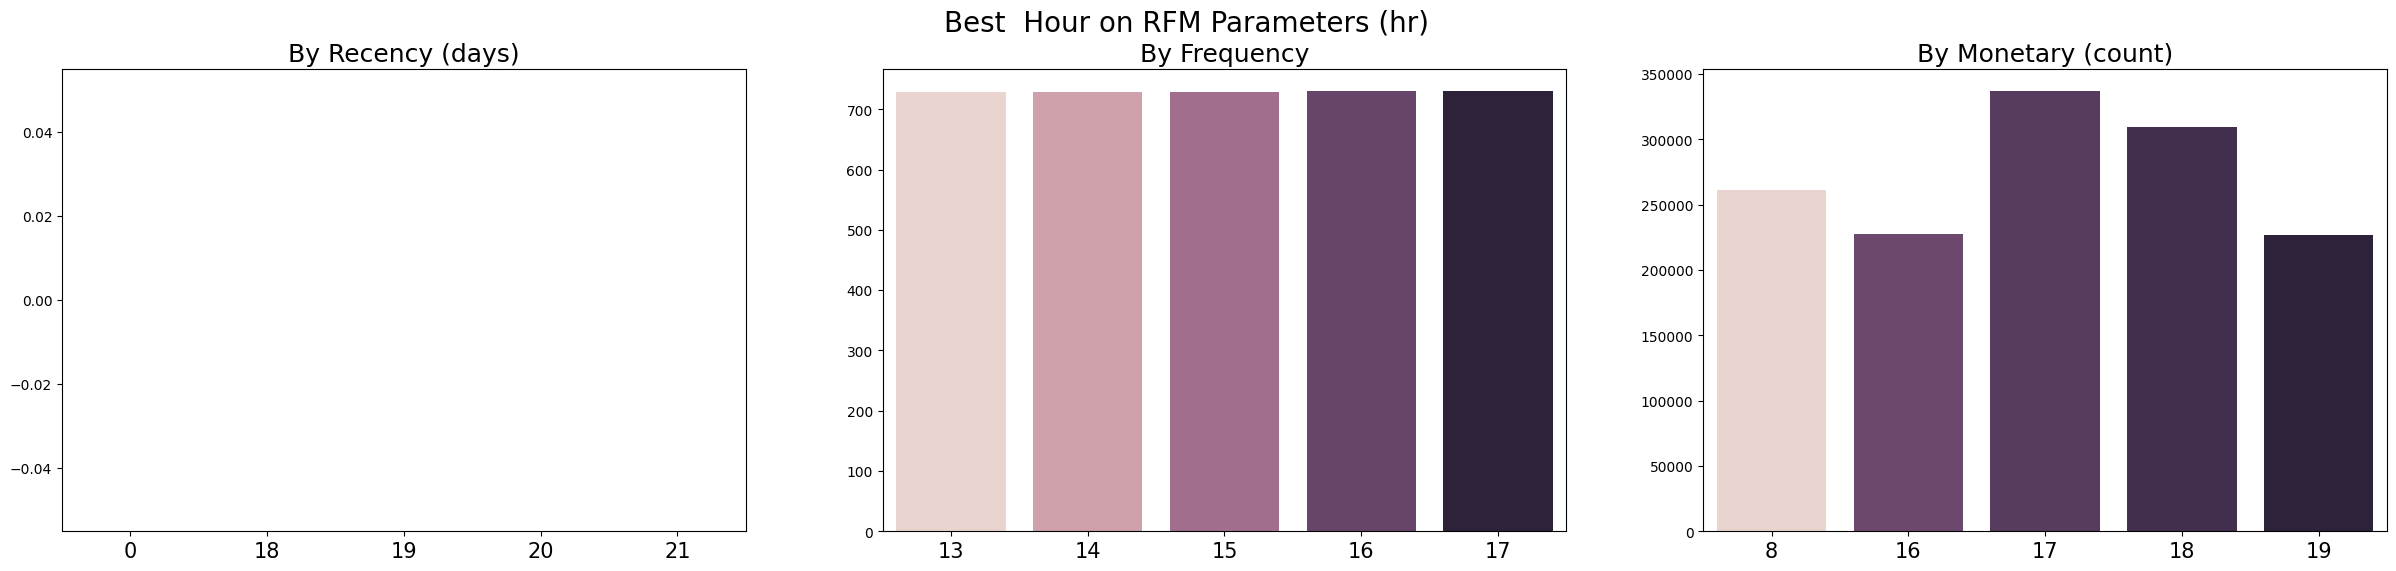

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="hr", data=rfm_df.sort_values(by="recency", ascending=True).head(5), hue="hr", ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="hr", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), hue="hr", ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="hr", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), hue="hr", ax=ax[2], legend=False)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary (count)", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best  Hour on RFM Parameters (hr)", fontsize=20)
plt.show()

Line chart untuk jumlah pengguna dari seluruh data pada tiap jam

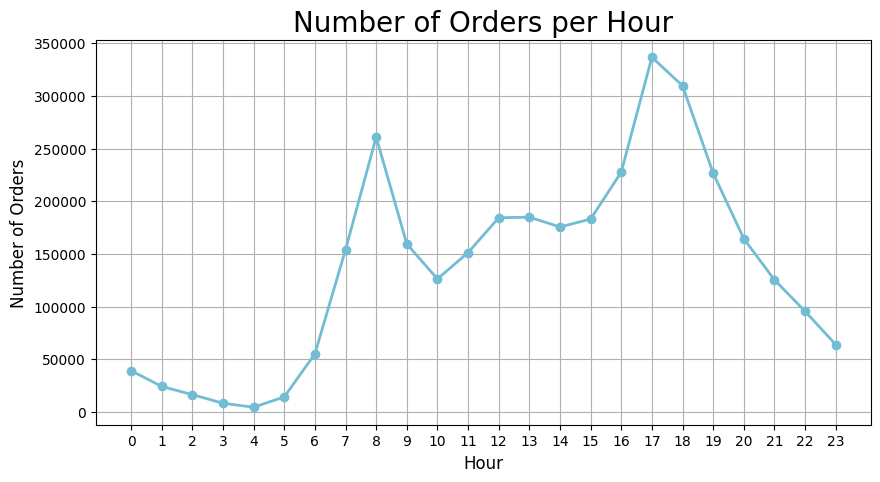

In [30]:
hourly_order_df = hours_df.groupby(by='hr').agg({
    
    "cnt": "sum"
})
plt.figure(figsize=(10, 5))
plt.plot(hourly_order_df.index, hourly_order_df["cnt"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Hour", loc="center", fontsize=20)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(range(24), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

### Pertanyaan 2: Kapan saat yang tepat untuk mempromosikan keanggotaan pada pengguna casual?

Membuat plot bar untuk menunjukkan jumlah pengguna kasual yang melakukan rental sepeda berdasarkan musim

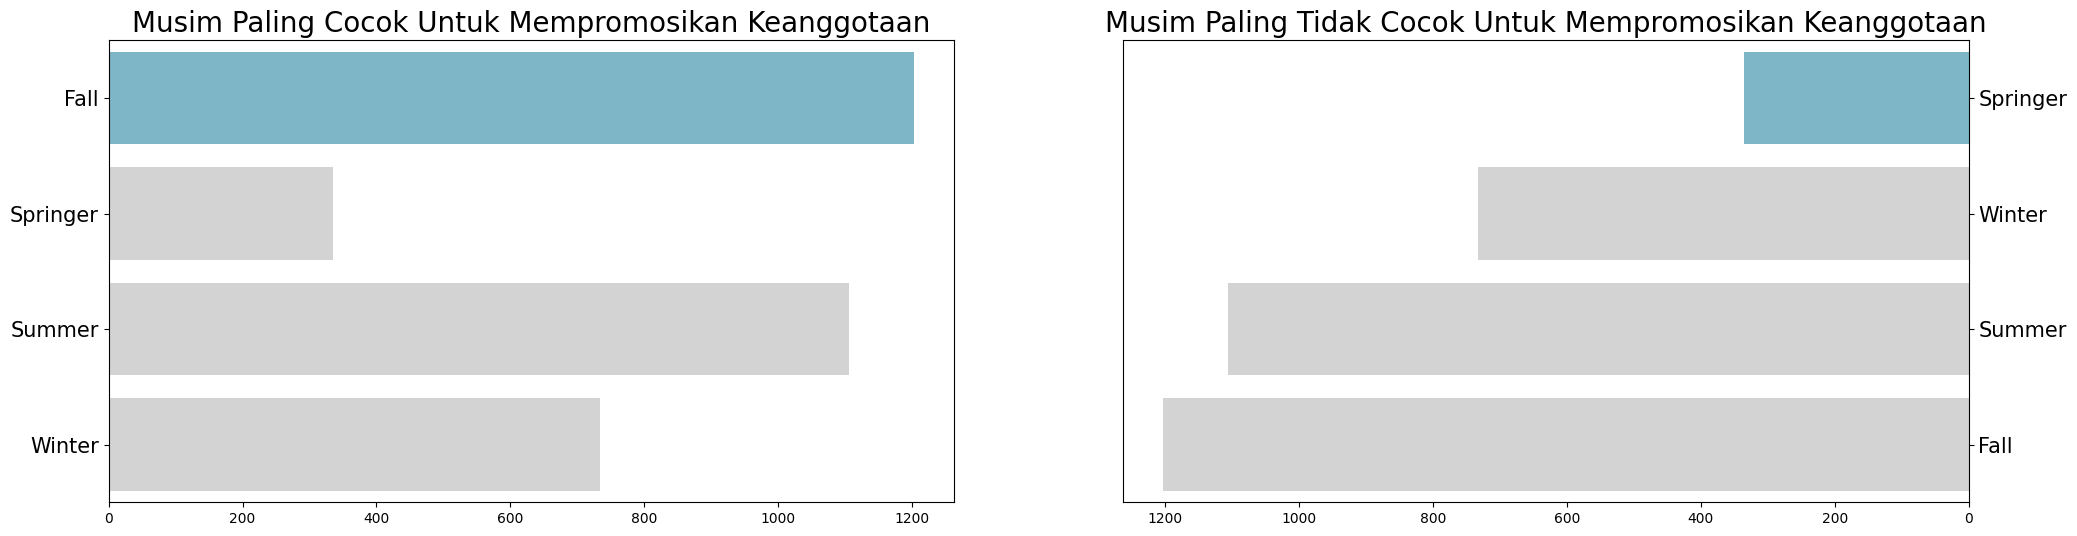

In [31]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
casual_season_df = days_df.groupby("season_group").agg({
    'casual':'mean'
})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="casual", y="season_group", data=casual_season_df, palette=colors, ax=ax[0], hue="season_group", legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Musim Paling Cocok Untuk Mempromosikan Keanggotaan", loc="center", fontsize=20)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="casual", y="season_group", data=casual_season_df.sort_values(by="casual", ascending=True), hue="season_group", palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Musim Paling Tidak Cocok Untuk Mempromosikan Keanggotaan", loc="center", fontsize=20)
ax[1].tick_params(axis='y', labelsize=15)


plt.show()

Visualisasi data jumlah pengguna Casual berdasarkan Suhu

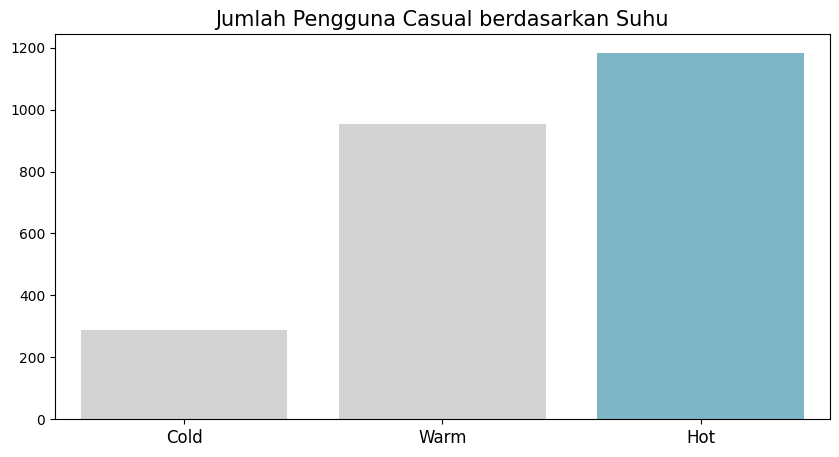

In [32]:
bytemp_df = days_df.groupby(by="temp_group").casual.mean().reset_index()
bytemp_df.rename(columns={"casual": "mean"}, inplace=True)


bytemp_df['temp_group'] = pd.Categorical(bytemp_df['temp_group'], ["Cold", "Warm", "Hot"])

plt.figure(figsize=(10, 5))


sns.barplot(
    x="temp_group", 
    y="mean",
    hue="temp_group",
    data=bytemp_df.sort_values(by="temp_group", ascending=False),
    palette={"Cold": "#D3D3D3", "Warm": "#D3D3D3", "Hot": "#72BCD4"},  
    legend=False  # Set legend to False
)

plt.title("Jumlah Pengguna Casual berdasarkan Suhu", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1:
  Pada visualisasi data jumlah count pada tiap Jam, terdapat kenaikan signifikan yang melakukan rental sepeda di jam 8 pagi, dan jam 17 sore
- Conclution pertanyaan 2:
  Dapat diasumsikan bahwa pengguna Casual memiliki frekuensi yang tinggi pada musim Fall dan Summer, juga di keadaan Suhu yang tidak Dingin. Maka perusahaan dapat mengambil tindakan mempromosikan keanggotaan pada Casual di Musim Fall atau Summer, dan di Suhu Hangat atau Panas, karena pada saat itu banyak jangkauan pengunjung Casual yang bisa ditawarkan keanggotaan.

In [33]:
days_df.to_csv("day_data.csv", index=False)

In [34]:
hours_df.to_csv("hour_data.csv", index=False)